In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR, SVR
drive.mount('/content/drive')
data = pd.DataFrame(pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/USA_cars_datasets.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#
# Maps for Future Data Preprocessing
#

#Map for title_status
def title_map(x):
    return x.map({'clean vehicle' : 0, 'salvage insurance' : 1})

#Map states to 1 of 4 regions
def state_map(x):
    return x.map({'pennsylvania' : 'NE', 'florida' : 'SE', 'texas': 'SW', 'california' : 'SW', 'michigan' : 'NE',
       'north carolina' : 'SE', 'minnesota' : 'NE', 'illinois' : 'NE', 'wisconsin' : "NE", 'virginia' : 'SE',
       'nevada' : "SW", 'new jersey' : "NW", 'oklahoma' : "SW", 'south carolina' : "SE", 'georgia' : "SE",
       'missouri' : "SE", 'new york': "NE", 'arizona' : "SW", 'ohio' : "NE", 'oregon' : "NW", 'tennessee' : "SE",
       'mississippi' : "SE", 'connecticut' : "NE", 'west virginia' : "SE", 'massachusetts' : "NE",
       'colorado' : "SW", 'alabama' : "SE", 'washington' : "NW", 'indiana': "NE", 'arkansas' : "SE", 'louisiana' : "SE",
       'utah' : "SW", 'kentucky' : "SE", 'ontario' : "NE", 'kansas' :"SW", 'maryland' : "SE", 'new mexico' : "SW",
       'nebraska' : "NW", 'idaho' : "NW", 'new hampshire' : "NE", 'montana' : "NW"})

#Map region to numeric value sorted by frequency, 3 being the most common
def region_map(x):
    return x.map({'SE' : 2, 'SW' : 1,'NE' : 3, 'NW' : 0})

<ipython-input-7-02e4f20943ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = data['color'].astype(str)
<ipython-input-7-02e4f20943ff>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title_status'] = data[['title_status']].apply(title_map)
<ipython-input-7-02e4f20943ff>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

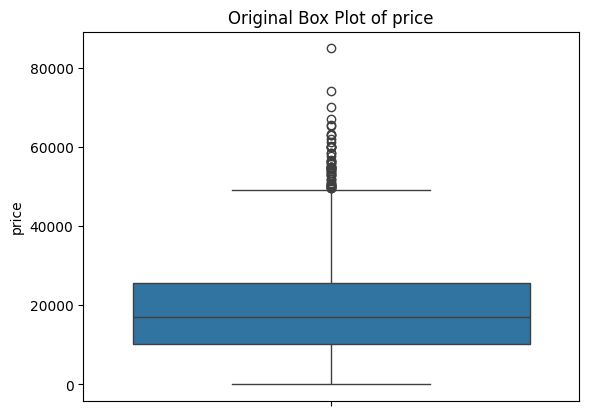

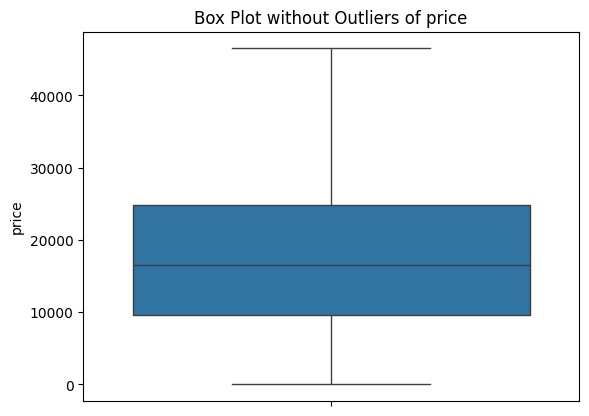

,price,year,title_status,mileage,state,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,...,color_black,color_blue,color_gold,color_gray,color_green,color_no_color,color_orange,color_red,color_silver,color_white
0,6300,2008,0,274117.0,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2899,2011,0,190552.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,5350,2018,0,39590.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,25000,2014,0,64146.0,2,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,27700,2018,0,6654.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [7]:
#
# Data Preprocessing
#

#Takes 10 most common colors and removes data that does not contain those colors
common_colors = list(data['color'].value_counts().index)[:10]
data = data[data['color'].isin(common_colors)]
data['color'] = data['color'].astype(str)
data['color'].replace('no_color','white')

#Apply maps from previous section
data['title_status'] = data[['title_status']].apply(title_map)
data['state'] = data[['state']].apply(state_map)
data['state'] = data[['state']].apply(region_map)

def removal_box_plot(data, column, lower_threshold, upper_threshold):
    sns.boxplot(data[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    data = data[data[column] <= upper_threshold]
   # data = data[data[column] >= lower_threshold]

    sns.boxplot(data[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return data

lower_threshold = 500
upper_threshold = 46500

data = removal_box_plot(data, 'price', lower_threshold, upper_threshold)

#Separates all possible classes into individual columns and gives a 0 or 1 depending on whether the class is true for that row
data = pd.get_dummies(data, columns=['brand','model', 'color'])

#Remove unused columns
data = data.drop(["condition", "vin", "Unnamed: 0", "lot", "country"], axis = 1)
# PCA EXTRACTION
pca = PCA(n_components = 158)

X = data.values[:,0:158]

principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents)


data.head()


In [8]:
#
# Linear Regression
#

X = data.drop('price',axis=1)
Y = data['price']
X_size = X.shape
Y_size = Y.shape


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(x_train, y_train)

# Get predictions
y_linear_pred = linear_model.predict(x_test)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_test, y_linear_pred)
r2_score = linear_model.score(x_test, y_test)
linear_mae = mean_absolute_error(y_test, y_linear_pred)


print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'Mean Absolute Error (MAE): {linear_mae:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')

Size of X: (2302, 162)
Size of Y: (2302,)
Linear Regression Metrics:
Mean Squared Error (MSE): 30931034.72
Mean Absolute Error (MAE): 3898.90
R-squared (R2): 0.71


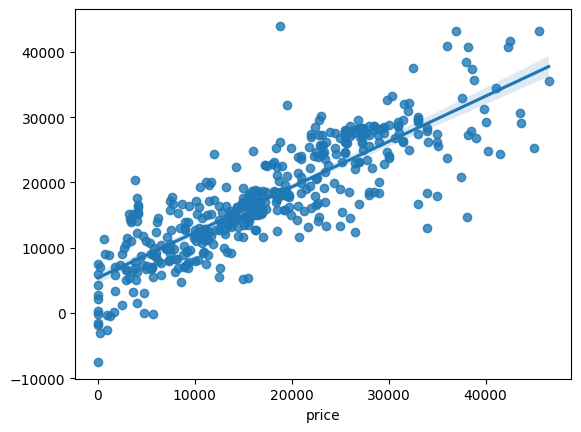

In [9]:
sns.regplot(x=y_test,y=y_linear_pred)
plt.show()

In [10]:
# Logistic Regression (Not intended for non binary predictions)
#

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Fit the model
logreg_model.fit(x_train, y_train)

# Predictions for Logistic Regression
y_pred = logreg_model.predict(x_test)

# Calculate metrics for Logistic Regression
log_mse = mean_squared_error(y_test, y_pred)
log_mae = mean_absolute_error(y_test, y_pred)
log_r2 = logreg_model.score(x_test, y_test)

print('Logistic Regression Metrics:')
print(f'Mean Squared Error (MSE): {log_mse:.2f}')
print(f'Mean Absolute Error (MAE): {log_mae:.2f}')
print(f'R-squared (R2): {log_r2:.2f}')

Logistic Regression Metrics:
Mean Squared Error (MSE): 194004599.01
Mean Absolute Error (MAE): 10826.36
R-squared (R2): 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Naive Bayes not viable due to non binary prediction

In [13]:
#
# Support Vector Regression
#

from sklearn import svm
regr = svm.SVR()
regr.fit(x_train, y_train)

y_svr_pred = regr.predict(x_test)

svr_mse = mean_squared_error(y_test, y_svr_pred)
svr_mae = mean_absolute_error(y_test, y_svr_pred)
svr_r2 = regr.score(x_test, y_test)

print('SVR Metrics:')
print(f'Mean Squared Error (MSE): {svr_mse:.2f}')
print(f'Mean Absolute Error (MAE): {svr_mae:.2f}')
print(f'R-squared (R2): {svr_r2:.2f}')


SVR Metrics:
Mean Squared Error (MSE): 106849719.15
Mean Absolute Error (MAE): 8384.45
R-squared (R2): 0.00


Loss every 500 epochs

Epoch 1, 	Training Loss: 97.3933, 	Validation Loss: 38.4928
Epoch 2, 	Training Loss: 96.7982, 	Validation Loss: 38.2733
Epoch 3, 	Training Loss: 96.2072, 	Validation Loss: 38.0553
Epoch 500, 	Training Loss: 8.3074, 	Validation Loss: 6.2154
Epoch 1000, 	Training Loss: 1.7530, 	Validation Loss: 4.1500
Epoch 1500, 	Training Loss: 0.7749, 	Validation Loss: 3.9081
Epoch 2000, 	Training Loss: 0.5332, 	Validation Loss: 3.8358
Epoch 2500, 	Training Loss: 0.4384, 	Validation Loss: 3.7876
Epoch 3000, 	Training Loss: 0.3889, 	Validation Loss: 3.7512
Epoch 3500, 	Training Loss: 0.3594, 	Validation Loss: 3.7246
Epoch 4000, 	Training Loss: 0.3409, 	Validation Loss: 3.7058
Epoch 4500, 	Training Loss: 0.3288, 	Validation Loss: 3.6927
Epoch 5000, 	Training Loss: 0.3208, 	Validation Loss: 3.6837


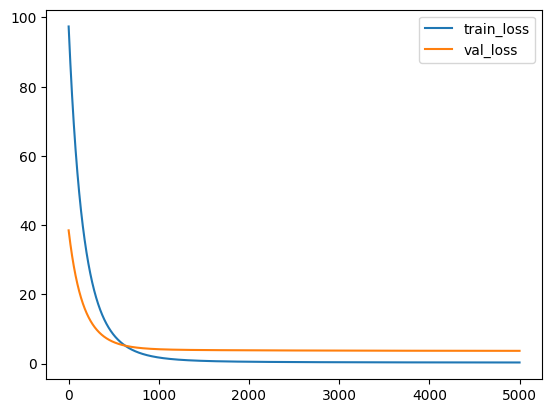

MSE: tensor(0.3208, grad_fn=<MeanBackward0>)
MAE: tensor(0.3912, grad_fn=<MeanBackward0>)


In [14]:
import torch
import tensorflow as tf
from typing_extensions import ParamSpec
import torch.optim as optim
import torch.nn as nn

#Converting Dataset to numpy and setting boolean as binary values
data_np = np.array(data)
data_np[data_np == True] = 1
data_np[data_np == False] = 0

#Drops price from dataset for X and store only price for Y
X = np.delete(data_np, 0, axis=1)
Y = data_np[:,0]
#print(X)
#print(Y)
x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(X, Y, test_size = 0.2, random_state = 100)

# Convert the arrays to a homogeneous data type (e.g., float32)
x_train_np = x_train_np.astype(np.float32)
x_test_np = x_test_np.astype(np.float32)
y_train_np = y_train_np.astype(np.float32)
y_test_np = y_test_np.astype(np.float32)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_np)
x_test_scaled = scaler.fit_transform(x_test_np)


y_train_scaled = scaler.fit_transform(y_train_np.reshape(-1, 1)).ravel()
y_test_scaled = scaler.fit_transform(y_test_np.reshape(-1, 1)).ravel()


x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)


#Defining linear reg model
def model_linear(t_in, w, b):
  t_p = torch.matmul(t_in, w) + b
  return t_p


#Defining Loss Function
def loss_fn(t_p, t_gnd):
  squared_diffs = (t_p - t_gnd) ** 2
  return squared_diffs.mean()


# Defining Training Loop
def training_loop(n_epochs, optimizer, w, b, train_t_in, val_t_in,
                  train_t_out, val_t_out):
    train_losses =[]
    val_losses =[]
    epochs = []
    for epoch in range(1, n_epochs + 1):
        # Zero the gradients
        optimizer.zero_grad()
        epochs.append(epoch)
        # Forward pass: compute predicted outputs
        train_t_p = model_linear(train_t_in, w, b)
        train_loss = loss_fn(train_t_p, train_t_out)
        train_losses.append(train_loss.detach().numpy())
        # Backward pass: compute gradient of the loss with respect to model parameters
        train_loss.backward()

        # Update the parameters
        optimizer.step()

        # Compute validation loss
        val_t_p = model_linear(val_t_in, w, b)
        val_loss = loss_fn(val_t_p, val_t_out)
        val_losses.append(val_loss.detach().numpy())
        # Print loss every 500 epochs
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, \tTraining Loss: {train_loss.item():.4f}, \tValidation Loss: {val_loss.item():.4f}")
    plt.plot(epochs, train_losses, label='train_loss')
    plt.plot(epochs, val_losses ,label='val_loss')
    plt.legend()
    plt.show()
    mae = nn.L1Loss()
    mse_result = loss_fn(train_t_p, train_t_out)
    print("MSE:", mse_result)
    mae_result = mae(train_t_p, train_t_out)
    print("MAE:", mae_result)

# Initialize w and b
w = torch.ones((162,), requires_grad = True)
b = torch.zeros((), requires_grad = True)

# Initialize the optimizer
learning_rate = 1e-3
optimizer = optim.SGD([w, b], lr=learning_rate)

# Call the training loop
print('Loss every 500 epochs\n')
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    w=w,
    b=b,
    train_t_in=x_train_tensor,
    val_t_in=x_test_tensor,
    train_t_out=y_train_tensor,
    val_t_out=y_test_tensor
)

